In [1]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files={'train': '../sst5/train_sst5.csv', 'val' : '../sst5/val_sst5.csv', 'test': '../sst5/test_sst5.csv'})

Using custom data configuration default-1ec86d73e728f420
Reusing dataset csv (C:\Users\AR88750\.cache\huggingface\datasets\csv\default-1ec86d73e728f420\0.0.0\bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
train_ds, val_ds, test_ds = dataset["train"], dataset["val"], dataset["test"]

In [3]:
train_ds  

Dataset({
    features: ['sentence', 'label'],
    num_rows: 8544
})

In [4]:
val_ds

Dataset({
    features: ['sentence', 'label'],
    num_rows: 1101
})

In [5]:
test_ds

Dataset({
    features: ['sentence', 'label'],
    num_rows: 2210
})

In [6]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [7]:
def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True)

tokenized_train_ds = train_ds.map(tokenize_function, batched=True)
tokenized_val_ds = val_ds.map(tokenize_function, batched=True)
tokenized_test_ds = test_ds.map(tokenize_function, batched=True)

Loading cached processed dataset at C:\Users\AR88750\.cache\huggingface\datasets\csv\default-1ec86d73e728f420\0.0.0\bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a\cache-b68b16a56a021efe.arrow
Loading cached processed dataset at C:\Users\AR88750\.cache\huggingface\datasets\csv\default-1ec86d73e728f420\0.0.0\bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a\cache-a17b5e2160882212.arrow
Loading cached processed dataset at C:\Users\AR88750\.cache\huggingface\datasets\csv\default-1ec86d73e728f420\0.0.0\bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a\cache-6948977559f14a4e.arrow


In [8]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [9]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [10]:
import torch
torch.cuda.empty_cache()

In [11]:
from transformers import TrainingArguments
training_args = TrainingArguments("trainer-V2", evaluation_strategy="epoch", num_train_epochs=5, learning_rate = 5e-06)

In [12]:
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=5e-06,
length_column_name=length,
load_best_model_at_end=False,
local_rank=-1,
log_level=-1,
log_level_replica=-1,
log_on_each_node=True,
logging_dir=trainer-V2\runs\Nov25_15-12-52_logti-a3446-15,
logging_first_step=False,
logging_nan_inf_filter=True,
loggi

In [13]:
from fastai.text.all import *
set_seed(42,True)

In [14]:
from transformers import Trainer
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

from transformers import TrainingArguments
training_args = TrainingArguments("trainer-V2", evaluation_strategy="epoch", num_train_epochs=5, learning_rate = 5e-06)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_val_ds,
    compute_metrics=compute_metrics
)
trainer.train()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Epoch,Training Loss,Validation Loss,Accuracy
1,1.210700,1.184552,0.471390
2,1.067400,1.153296,0.500454
3,0.932000,1.214680,0.484105
4,0.855300,1.232487,0.483197
5,0.785200,1.259004,0.482289


Saving model checkpoint to trainer-V2\checkpoint-500
Configuration saved in trainer-V2\checkpoint-500\config.json
Model weights saved in trainer-V2\checkpoint-500\pytorch_model.bin
Saving model checkpoint to trainer-V2\checkpoint-1000
Configuration saved in trainer-V2\checkpoint-1000\config.json
Model weights saved in trainer-V2\checkpoint-1000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 1101
  Batch size = 8
Saving model checkpoint to trainer-V2\checkpoint-1500
Configuration saved in trainer-V2\checkpoint-1500\config.json
Model weights saved in trainer-V2\checkpoint-1500\pytorch_model.bin
Saving model checkpoint to trainer-V2\checkpoint-2000
Configuration saved in trainer-V2\checkpoint-2000\config.json
Model weights saved in trainer-V2\checkpoint-2000\pytorch_model.bin
The following columns in the evaluation 

TrainOutput(global_step=5340, training_loss=0.9922025187631671, metrics={'train_runtime': 2385.5476, 'train_samples_per_second': 17.908, 'train_steps_per_second': 2.238, 'total_flos': 1.124040704606208e+16, 'train_loss': 0.9922025187631671, 'epoch': 5.0})

In [15]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_test_ds,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 2210
  Batch size = 8


{'eval_loss': 1.1790257692337036,
 'eval_accuracy': 0.5294117647058824,
 'eval_runtime': 39.6638,
 'eval_samples_per_second': 55.718,
 'eval_steps_per_second': 6.984}

In [16]:
from fastai.text.all import *
set_seed(42,True)

In [17]:
training_args = TrainingArguments("trainer-V2-part2", evaluation_strategy="epoch", num_train_epochs=5, learning_rate = 5e-06)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_val_ds,
    compute_metrics=compute_metrics
)
trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running training *****
  Num examples = 8544
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 5340


Epoch,Training Loss,Validation Loss,Accuracy
1,0.701300,1.347712,0.494096
2,0.580500,1.450428,0.493188
3,0.477700,1.633031,0.475023
4,0.438100,1.686663,0.466848
5,0.417200,1.730080,0.475023


Saving model checkpoint to trainer-V2-part2\checkpoint-500
Configuration saved in trainer-V2-part2\checkpoint-500\config.json
Model weights saved in trainer-V2-part2\checkpoint-500\pytorch_model.bin
Saving model checkpoint to trainer-V2-part2\checkpoint-1000
Configuration saved in trainer-V2-part2\checkpoint-1000\config.json
Model weights saved in trainer-V2-part2\checkpoint-1000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 1101
  Batch size = 8
Saving model checkpoint to trainer-V2-part2\checkpoint-1500
Configuration saved in trainer-V2-part2\checkpoint-1500\config.json
Model weights saved in trainer-V2-part2\checkpoint-1500\pytorch_model.bin
Saving model checkpoint to trainer-V2-part2\checkpoint-2000
Configuration saved in trainer-V2-part2\checkpoint-2000\config.json
Model weights saved in trainer-V2-part2\ch

TrainOutput(global_step=5340, training_loss=0.5253136538387684, metrics={'train_runtime': 2389.1131, 'train_samples_per_second': 17.881, 'train_steps_per_second': 2.235, 'total_flos': 1.124040704606208e+16, 'train_loss': 0.5253136538387684, 'epoch': 5.0})

In [19]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_test_ds,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 2210
  Batch size = 8


{'eval_loss': 1.6375176906585693,
 'eval_accuracy': 0.5113122171945701,
 'eval_runtime': 38.7237,
 'eval_samples_per_second': 57.071,
 'eval_steps_per_second': 7.153}

In [33]:
import numpy as np
from datasets import load_metric

acc = load_metric("accuracy")
f1 = load_metric('f1')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    res = {"accuracy" : acc.compute(predictions=predictions, references=labels),
           "f1" : f1.compute(predictions=predictions, references=labels, average="weighted")
           }
        
    return res

In [34]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_test_ds,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 2210
  Batch size = 8


{'eval_loss': 1.6375176906585693,
 'eval_accuracy': {'accuracy': 0.5113122171945701},
 'eval_f1': {'f1': 0.5121534048389726},
 'eval_runtime': 39.5457,
 'eval_samples_per_second': 55.885,
 'eval_steps_per_second': 7.005}

In [35]:
from fastai.text.all import *
set_seed(42,True)

In [36]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)
training_args = TrainingArguments("trainer_evaluation_test", evaluation_strategy="epoch", num_train_epochs=2)

loading configuration file https://huggingface.co/bert-base-cased/resolve/main/config.json from cache at C:\Users\AR88750/.cache\huggingface\transformers\a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_val_ds,
    compute_metrics=compute_metrics
)
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running training *****
  Num examples = 8544
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2136


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.208500,1.141122,{'accuracy': 0.5022706630336058},{'f1': 0.46562137180567076}


Saving model checkpoint to trainer_evaluation_test\checkpoint-500
Configuration saved in trainer_evaluation_test\checkpoint-500\config.json
Model weights saved in trainer_evaluation_test\checkpoint-500\pytorch_model.bin
Saving model checkpoint to trainer_evaluation_test\checkpoint-1000
Configuration saved in trainer_evaluation_test\checkpoint-1000\config.json
Model weights saved in trainer_evaluation_test\checkpoint-1000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 1101
  Batch size = 8
Saving model checkpoint to trainer_evaluation_test\checkpoint-1500
Configuration saved in trainer_evaluation_test\checkpoint-1500\config.json
Model weights saved in trainer_evaluation_test\checkpoint-1500\pytorch_model.bin
Saving model checkpoint to trainer_evaluation_test\checkpoint-2000
Configuration saved in trainer_evaluatio

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_test_ds,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

In [ ]:
0.5235294117647059

In [26]:
from fastai.text.all import *
set_seed(42,True)

In [27]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)
training_args = TrainingArguments("trainer_evaluation_test", evaluation_strategy="epoch", num_train_epochs=1)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_val_ds,
    compute_metrics=compute_metrics
)
trainer.train()

loading configuration file https://huggingface.co/bert-base-cased/resolve/main/config.json from cache at C:\Users\AR88750/.cache\huggingface\transformers\a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_

Epoch,Training Loss,Validation Loss,Accuracy
1,1.187400,1.133839,0.495005


Saving model checkpoint to trainer_evaluation_test\checkpoint-500
Configuration saved in trainer_evaluation_test\checkpoint-500\config.json
Model weights saved in trainer_evaluation_test\checkpoint-500\pytorch_model.bin
Saving model checkpoint to trainer_evaluation_test\checkpoint-1000
Configuration saved in trainer_evaluation_test\checkpoint-1000\config.json
Model weights saved in trainer_evaluation_test\checkpoint-1000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 1101
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1068, training_loss=1.256040937445137, metrics={'train_runtime': 475.7221, 'train_samples_per_second': 17.96, 'train_steps_per_second': 2.245, 'total_flos': 2248081409212416.0, 'train_loss': 1.256040937445137, 'epoch': 1.0})

In [29]:
set_seed(42,True)

In [30]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)
training_args = TrainingArguments("trainer_evaluation_test", evaluation_strategy="epoch", num_train_epochs=1)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_val_ds,
    compute_metrics=compute_metrics
)
trainer.train()

loading configuration file https://huggingface.co/bert-base-cased/resolve/main/config.json from cache at C:\Users\AR88750/.cache\huggingface\transformers\a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_

Epoch,Training Loss,Validation Loss,Accuracy
1,1.187400,1.133839,0.495005


Saving model checkpoint to trainer_evaluation_test\checkpoint-500
Configuration saved in trainer_evaluation_test\checkpoint-500\config.json
Model weights saved in trainer_evaluation_test\checkpoint-500\pytorch_model.bin
Saving model checkpoint to trainer_evaluation_test\checkpoint-1000
Configuration saved in trainer_evaluation_test\checkpoint-1000\config.json
Model weights saved in trainer_evaluation_test\checkpoint-1000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 1101
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1068, training_loss=1.256040937445137, metrics={'train_runtime': 476.4745, 'train_samples_per_second': 17.932, 'train_steps_per_second': 2.241, 'total_flos': 2248081409212416.0, 'train_loss': 1.256040937445137, 'epoch': 1.0})

In [39]:
loss_train = [1.213600, 0.898000, 0.518800, 0.389400, 0.375700, 0.346900, 0.234900, 0.153400, 0.088400, 0.051700, 0.030100, 0.022700, 0.005100]
loss_val = [1.156113, 1.211105, 1.582793, 2.721417, 2.386631, 2.772310, 3.299783, 3.878757, 4.248393, 4.291302, 4.676865, 4.858495, 4.979692]

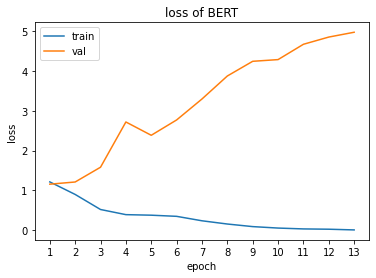

In [40]:
import matplotlib.pyplot as plt

plt.plot(loss_train)
plt.plot(loss_val)
plt.title("loss of BERT")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xticks(np.arange(len(loss_train)), np.arange(1, len(loss_val)+1))
plt.legend(["train", "val"])
plt.show()

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_test_ds,
)
trainer.evaluate()

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

training_args = TrainingArguments("full_trainer", evaluation_strategy="epoch")

trainer = Trainer(
    model=model, args=training_args, train_dataset=full_train_dataset, eval_dataset=full_eval_dataset
)
trainer.train()

loading configuration file https://huggingface.co/bert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file https://huggingface.co/bert-base-cased/resolve/main/pytorch_model.bin from cache at /

Epoch,Training Loss,Validation Loss
1,0.332700,0.295111
2,0.225900,0.332293
3,0.102800,0.366372


Saving model checkpoint to full_trainer/checkpoint-500
Configuration saved in full_trainer/checkpoint-500/config.json
Model weights saved in full_trainer/checkpoint-500/pytorch_model.bin
Saving model checkpoint to full_trainer/checkpoint-1000
Configuration saved in full_trainer/checkpoint-1000/config.json
Model weights saved in full_trainer/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to full_trainer/checkpoint-1500
Configuration saved in full_trainer/checkpoint-1500/config.json
Model weights saved in full_trainer/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to full_trainer/checkpoint-2000
Configuration saved in full_trainer/checkpoint-2000/config.json
Model weights saved in full_trainer/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to full_trainer/checkpoint-2500
Configuration saved in full_trainer/checkpoint-2500/config.json
Model weights saved in full_trainer/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to full_trainer/checkpoint-30

TrainOutput(global_step=9375, training_loss=0.2477896944173177, metrics={'train_runtime': 19390.9336, 'train_samples_per_second': 3.868, 'train_steps_per_second': 0.483, 'total_flos': 1.9733329152e+16, 'train_loss': 0.2477896944173177, 'epoch': 3.0})

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=full_train_dataset,
    eval_dataset=full_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 25000
  Batch size = 8


{'eval_accuracy': 0.9258,
 'eval_loss': 0.36637213826179504,
 'eval_runtime': 1705.8043,
 'eval_samples_per_second': 14.656,
 'eval_steps_per_second': 1.832}

In [ ]:
model.save_pretrained("my_imdb_model")

Configuration saved in my_imdb_model/config.json
Model weights saved in my_imdb_model/pytorch_model.bin
